In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import json
%matplotlib inline  

In [2]:
with open('wpd.json', 'r') as f:
    data = ''.join(f.readlines())

data = json.loads(data)
extract = list()

for pt in data['datasetColl'][0]['data']:
    [guns, shooters] = pt['value']
    country = ''
    if guns > 80:
        country = 'united states'
    if shooters > 30:
        country = 'yemen'

    extract.append([guns, shooters, country])


frame = pd.DataFrame(extract, columns=['guns', 'shooters', 'country'])


,guns,shooters
guns,1.000000,0.529725
shooters,0.529725,1.000000


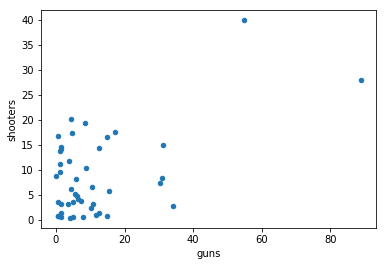

In [3]:
frame.plot.scatter('guns','shooters')
frame.corr()

,guns,shooters
guns,1.000000,0.423134
shooters,0.423134,1.000000


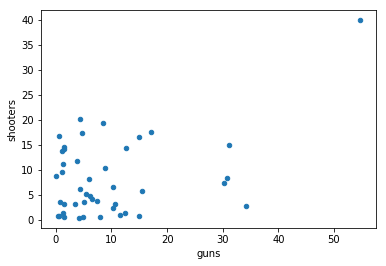

In [4]:
nous = frame[frame['country']!='united states']
nous.plot.scatter('guns','shooters')
nous.corr()

,guns,shooters
guns,1.00000,0.05337
shooters,0.05337,1.00000


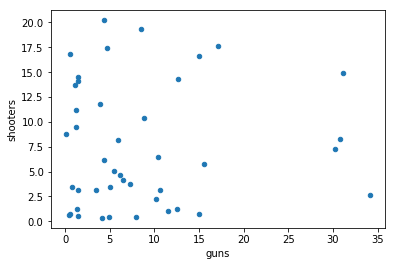

In [5]:
neither = frame[(frame['country']!='united states') & (frame['country']!='yemen')]
neither.plot.scatter('guns','shooters')
neither.corr()

In [6]:
def bootstrap_confidence_intervals(data,ci):
    bootstraps = np.array([data.sample(len(data),replace=True).corr()['shooters']['guns'] for x in xrange(10**5)])
    plt.hist(bootstraps, bins=250)
    plt.show()
    return [round(x,2) for x in 
            [np.percentile(bootstraps,50-ci/2), np.percentile(bootstraps,50), np.percentile(bootstraps,50+ci/2)]]

In [7]:
def wrap(data, percent, name):
    print str(percent) + '% confidence interval for ' + name + ': ' + str(bootstrap_confidence_intervals(data, percent))

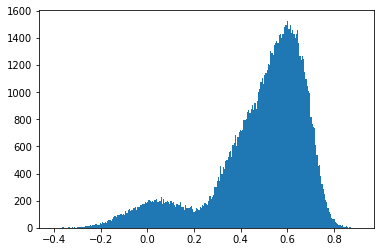

60% confidence interval for all data: [0.36, 0.53, 0.64]


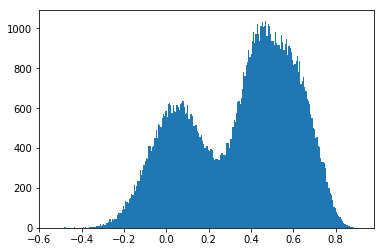

60% confidence interval for all data except US: [0.07, 0.4, 0.58]


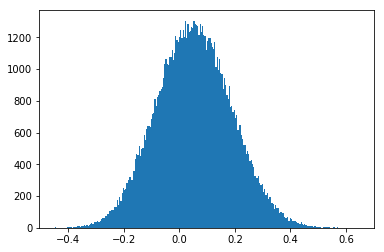

60% confidence interval for all data except US and Yemen: [-0.06, 0.05, 0.17]


In [8]:
wrap(frame, 60, 'all data')
wrap(nous, 60, 'all data except US')
wrap(neither, 60, 'all data except US and Yemen')